# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy.distance
import geopy
import plotly.express as px
import ipywidgets
from folium import plugins

# Reading Dataset

In [2]:
data = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')

In [3]:
data = data.head(1000)

In [4]:
data.dropna()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,77.0,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,74.0,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0
11,7211,RELIANCE MARKET,699 Castro St,San Francisco,CA,94114,37.757743,-122.434626,POINT (-122.434626 37.757743),1.415586e+10,...,86.0,Routine - Unscheduled,7211_20181001_103123,Food in poor condition,Moderate Risk,115.0,115.0,3.0,5.0,5.0
12,7489,GAS & SHOP,599 South Van Ness Ave,San Francisco,CA,94110,37.763803,-122.417326,POINT (-122.417326 37.763803),1.415587e+10,...,94.0,Routine - Unscheduled,7489_20180710_103132,Improper thawing methods,Moderate Risk,53.0,53.0,3.0,2.0,20.0
15,37060,Halu,312 08th Ave,San Francisco,CA,94118,37.782576,-122.466480,POINT (-122.46648 37.782576),1.415523e+10,...,85.0,Routine - Unscheduled,37060_20190507_103142,Unclean nonfood contact surfaces,Low Risk,5.0,5.0,8.0,4.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1018,PETES BARBEQUE,2399 MISSION St,San Francisco,CA,94110,37.758684,-122.418975,POINT (-122.418975 37.758684),1.415582e+10,...,87.0,Routine - Unscheduled,1018_20180208_103149,Wiping cloths not clean or properly stored or ...,Low Risk,53.0,53.0,3.0,2.0,20.0
991,1596,BURGERMEISTER,86 Carl St,San Francisco,CA,94117,37.765848,-122.449664,POINT (-122.449664 37.765848),1.415556e+10,...,90.0,Routine - Unscheduled,1596_20190710_103133,Foods not protected from contamination,Moderate Risk,29.0,29.0,7.0,11.0,3.0
992,1931,YUMMY YUMMY VIETNAMESE RESTAURANT,1015 IRVING St,San Francisco,CA,94122,37.763913,-122.468809,POINT (-122.468809 37.763913),1.415556e+10,...,92.0,Routine - Unscheduled,1931_20180108_103133,Foods not protected from contamination,Moderate Risk,109.0,109.0,10.0,11.0,14.0
995,7538,FREDS LIQUOR & DELI,151 06th St,San Francisco,CA,94103,37.774722,-122.406761,POINT (-122.406761 37.774722),1.415555e+10,...,92.0,Routine - Unscheduled,7538_20190923_103120,Moderate risk food holding temperature,Moderate Risk,32.0,32.0,1.0,10.0,34.0


In [5]:
#data.drop_duplicates(inplace=True)
mean_value1 = data['business_latitude'].mean()
mean_value2 = data['business_longitude'].mean()
data['business_latitude'].fillna(value=mean_value1, inplace=True)
data['business_longitude'].fillna(value=mean_value2, inplace=True)

# Data Analysis

In [6]:
data.isnull().sum()

business_id                       0
business_name                     0
business_address                  0
business_city                     0
business_state                    0
business_postal_code             20
business_latitude                 0
business_longitude                0
business_location               148
business_phone_number           713
inspection_id                     0
inspection_date                   0
inspection_score                 92
inspection_type                   0
violation_id                     38
violation_description            38
risk_category                    38
Neighborhoods                   149
SF Find Neighborhoods           149
Current Police Districts        149
Current Supervisor Districts    149
Analysis Neighborhoods          149
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   1000 non-null   int64  
 1   business_name                 1000 non-null   object 
 2   business_address              1000 non-null   object 
 3   business_city                 1000 non-null   object 
 4   business_state                1000 non-null   object 
 5   business_postal_code          980 non-null    object 
 6   business_latitude             1000 non-null   float64
 7   business_longitude            1000 non-null   float64
 8   business_location             852 non-null    object 
 9   business_phone_number         287 non-null    float64
 10  inspection_id                 1000 non-null   object 
 11  inspection_date               1000 non-null   object 
 12  inspection_score              908 non-null    float64
 13  insp

In [8]:
data.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
count,1000.000000,1000.000000,1000.000000,2.870000e+02,908.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,27455.987000,37.772172,-122.426424,1.415548e+10,85.817181,56.566392,56.566392,5.400705,5.438308,19.155112
std,30570.978946,0.021011,0.024943,9.032316e+05,8.124558,34.759527,34.759527,2.632905,3.288395,11.643808
min,19.000000,37.681741,-122.510043,1.415026e+10,46.000000,4.000000,4.000000,1.000000,1.000000,1.000000
25%,2829.000000,37.760954,-122.433101,1.415537e+10,81.000000,26.000000,26.000000,3.000000,3.000000,8.000000
50%,7662.000000,37.773332,-122.420975,1.415559e+10,87.000000,53.000000,53.000000,6.000000,4.000000,20.000000
75%,59071.000000,37.787724,-122.408926,1.415582e+10,92.000000,94.500000,94.500000,8.000000,9.000000,30.000000
max,101700.000000,37.824494,-122.371798,1.415844e+10,100.000000,117.000000,117.000000,10.000000,11.000000,41.000000


In [9]:
df=data.groupby(by='business_id').mean()
df

,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
business_id,,,,,,,,,
19,37.786848,-122.421547,NaN,94.0,50.0,50.0,4.0,6.0,21.0
73,37.788932,-122.433895,NaN,88.0,102.0,102.0,4.0,6.0,30.0
80,37.774941,-122.452797,NaN,96.0,12.0,12.0,7.0,4.0,18.0
95,37.739207,-122.417447,NaN,88.5,83.0,83.0,9.0,2.0,2.0
102,37.788484,-122.410045,NaN,86.0,19.0,19.0,6.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...
99707,37.772172,-122.426424,1.415552e+10,87.0,NaN,NaN,NaN,NaN,NaN
99820,37.772172,-122.426424,1.415750e+10,NaN,NaN,NaN,NaN,NaN,NaN
100330,37.772172,-122.426424,NaN,86.0,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'business_id'}>,
        <AxesSubplot:title={'center':'business_latitude'}>,
        <AxesSubplot:title={'center':'business_longitude'}>],
       [<AxesSubplot:title={'center':'business_phone_number'}>,
        <AxesSubplot:title={'center':'inspection_score'}>,
        <AxesSubplot:title={'center':'Neighborhoods'}>],
       [<AxesSubplot:title={'center':'SF Find Neighborhoods'}>,
        <AxesSubplot:title={'center':'Current Police Districts'}>,
        <AxesSubplot:title={'center':'Current Supervisor Districts'}>],
       [<AxesSubplot:title={'center':'Analysis Neighborhoods'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

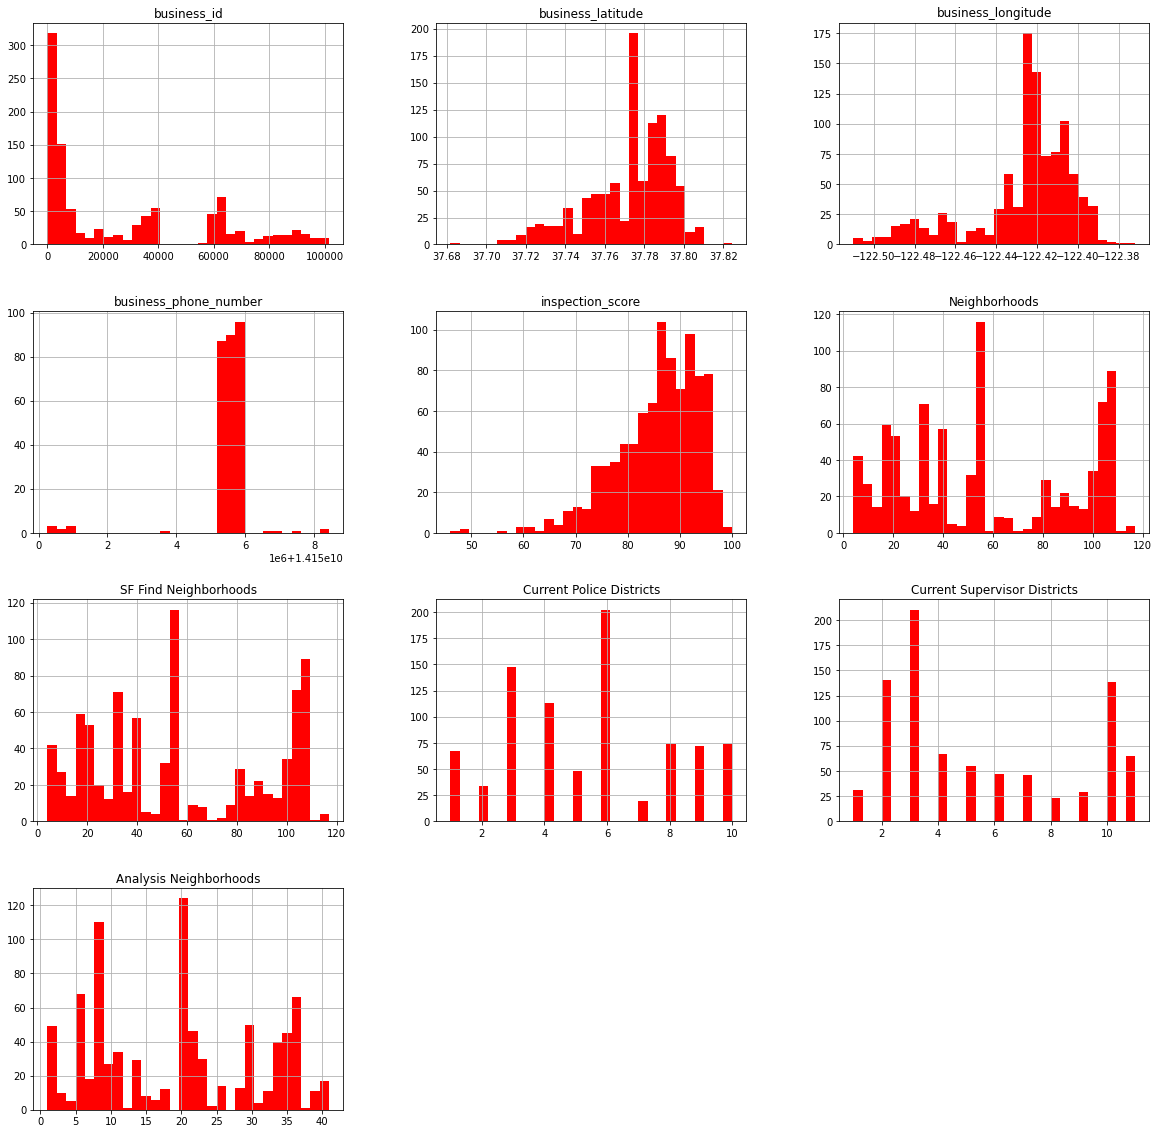

In [10]:
data.hist(bins=30, figsize=(20,20), color='r')

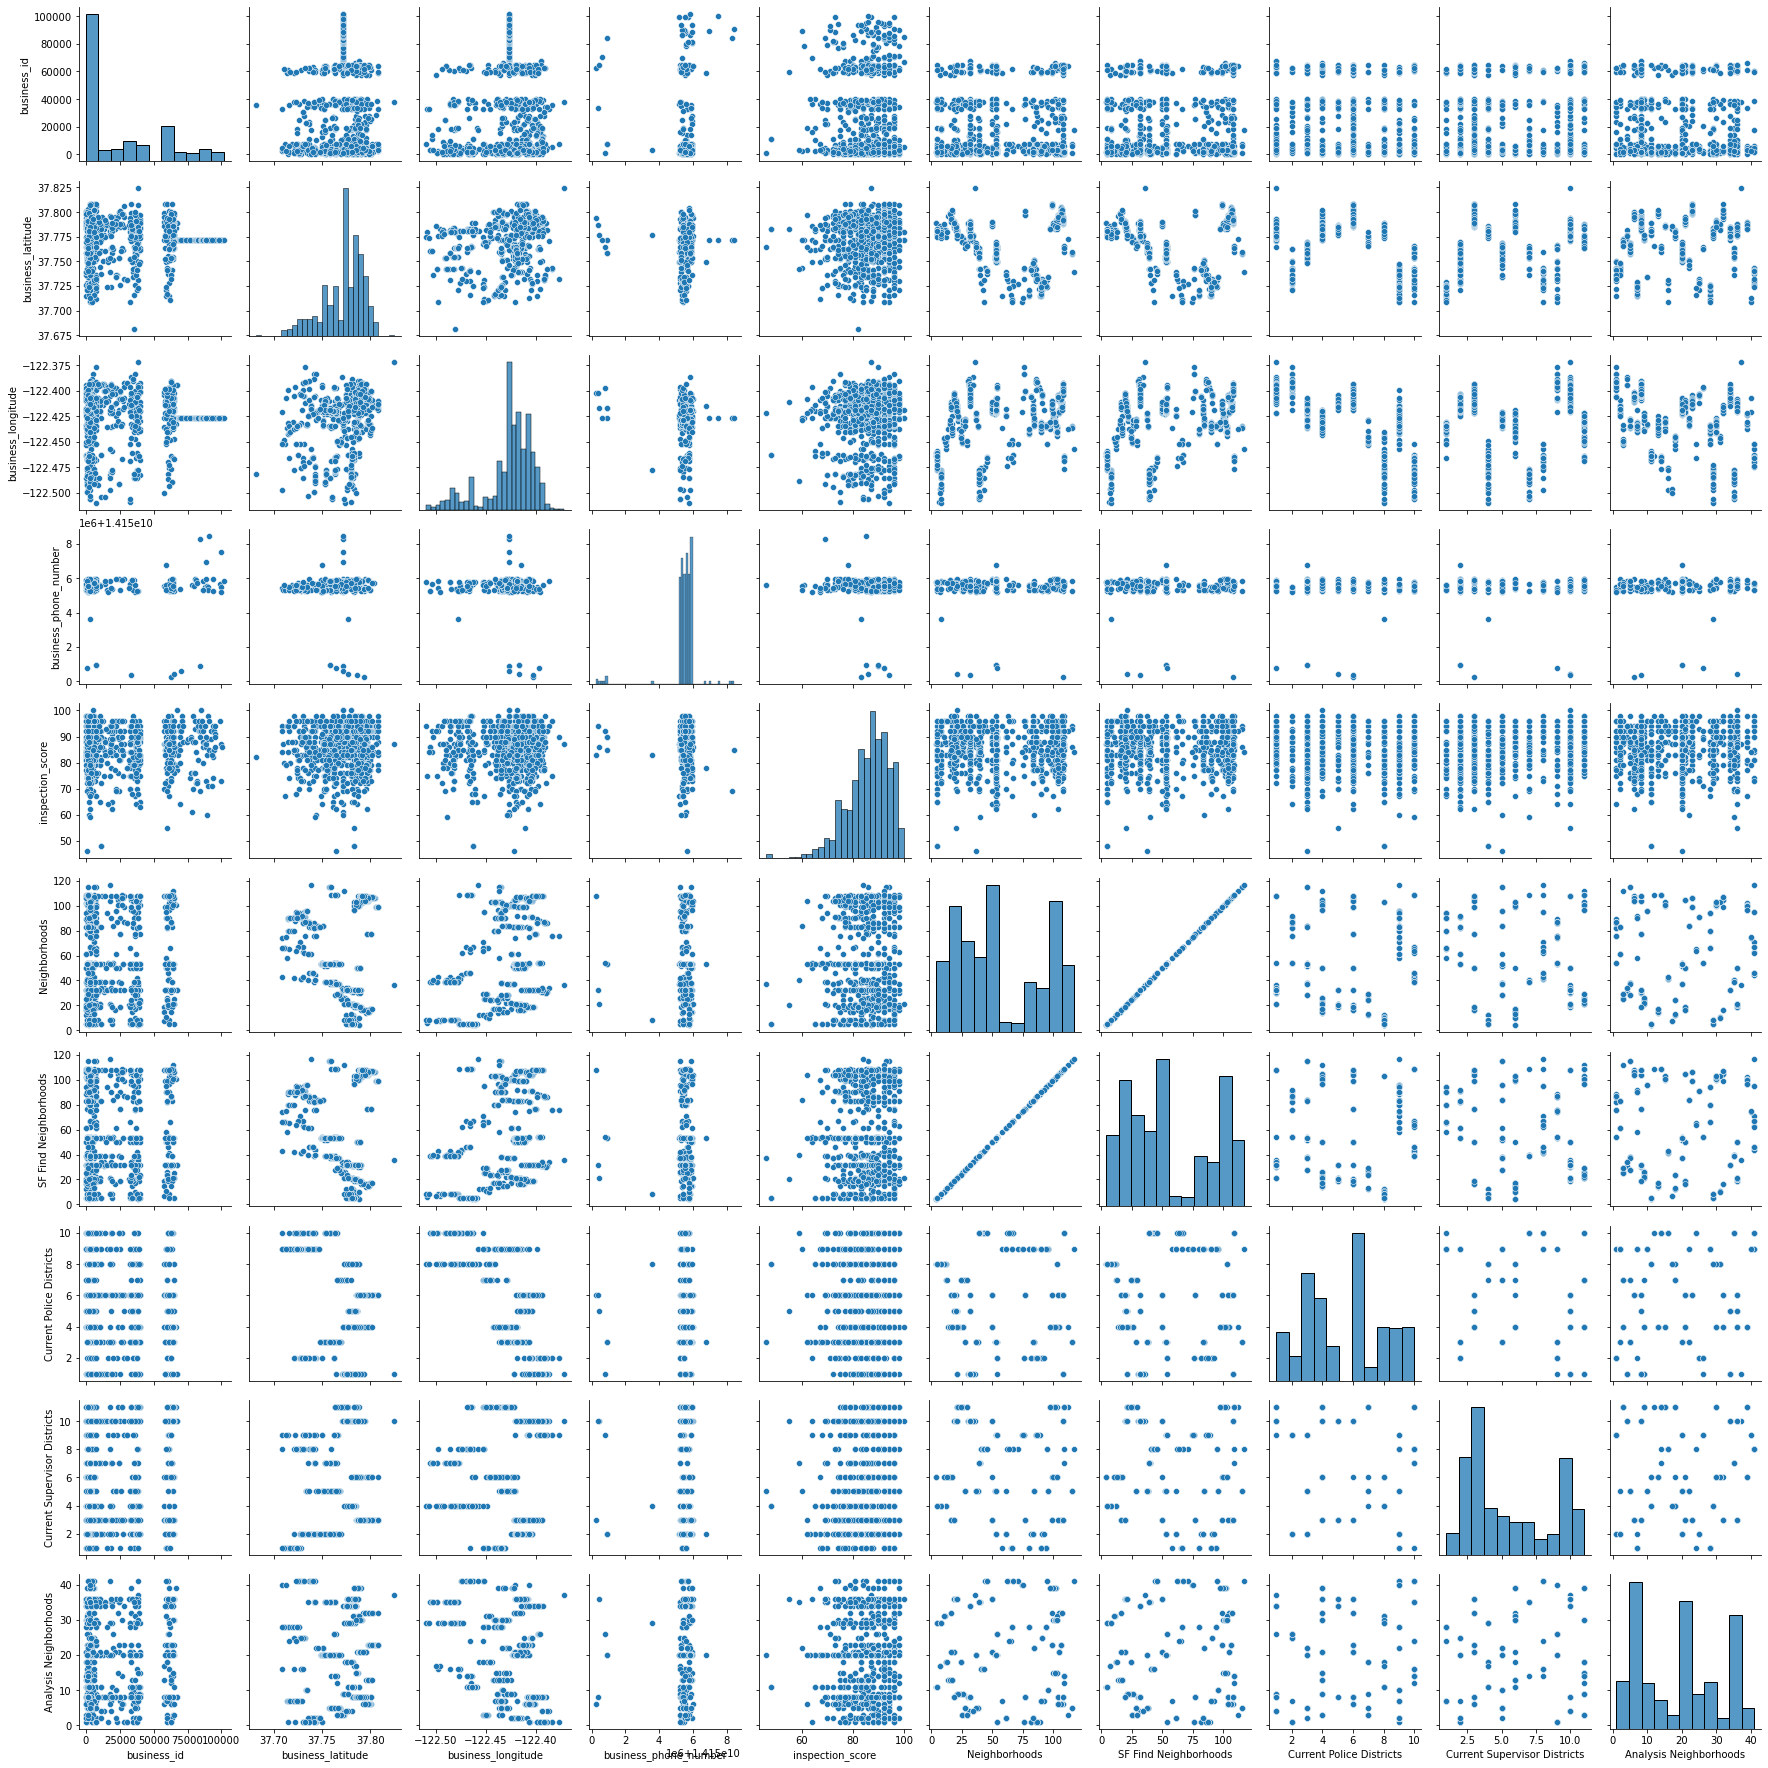

In [11]:
sns.pairplot(data)

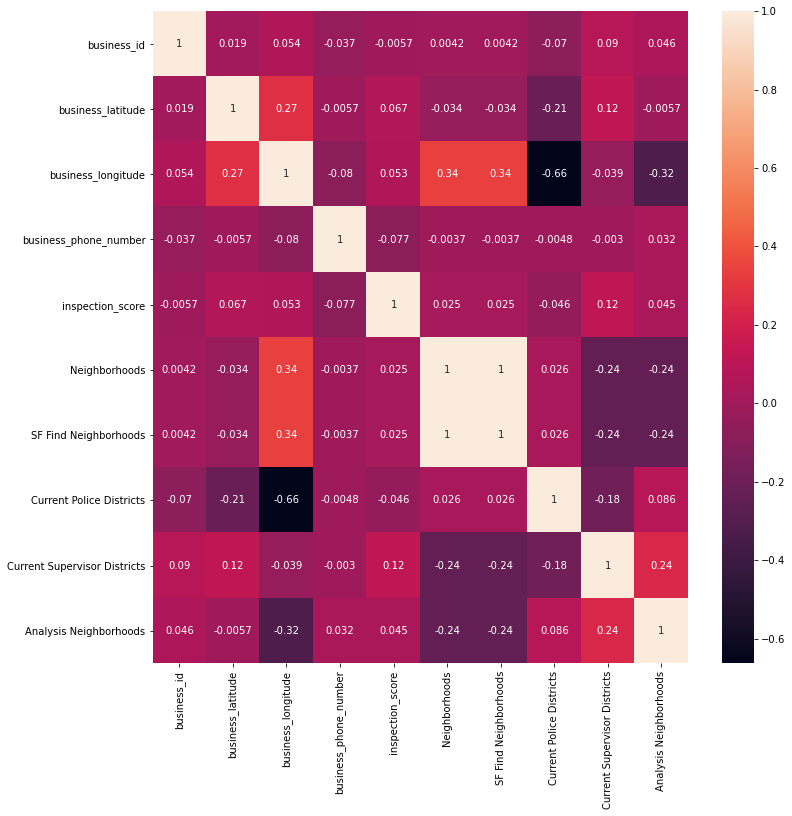

In [12]:
corr=data.corr()
plot.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)
plot.show()

# Generating Dashboard using Folium

In [23]:
# create map
map = folium.Map(location=[37.76, -122.40], zoom_start=12)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Resturant in San Francisco, California</b></h3>
             '''

# plot airport locations
for (index, row) in data.iterrows():
    folium.Marker(location=[row.loc['business_latitude'], row.loc['business_longitude']], 
                  popup=row.loc['business_name'] + ' ' + row.loc['business_city'] + ' ' + row.loc['business_state'], 
                  tooltip='click').add_to(map)
    
map.get_root().html.add_child(folium.Element(title_html))
    
# display map    
display(map)

#saving the map
map.save('F:/Projects/food industry/map.html')

In [22]:
high = data[data['risk_category'] == 'High Risk']
moderate = data[data['risk_category'] == 'Moderate Risk']
low = data[data['risk_category'] == 'Low Risk']

#widgets
low_risk = ipywidgets.Checkbox(description='Low Risk')
moderate_risk = ipywidgets.Checkbox(description='Moderate Risk')
high_risk = ipywidgets.Checkbox(description='High Risk')

#layout 
ui = ipywidgets.HBox([low_risk,moderate_risk,high_risk])



#widget function 
def plot_group(low_risk, moderate_risk, high_risk):
    
    dg = folium.Map(location=[37.76, -122.40], zoom_start=12)
    
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>Risk level of Resturants</b></h3>
             '''
    
    
    if low_risk == True:
        for (index, row) in high.iterrows():
            folium.Marker(location=[row.loc['business_latitude'], row.loc['business_longitude']], 
                          popup=row.loc['business_name'] + ' ' + row.loc['business_city'] + ' ' + row.loc['business_state'], 
                          tooltip='click', icon=folium.Icon(color='green', icon = 'bolt', prefix='fa')).add_to(dg)
            
    if moderate_risk == True:
        for (index, row) in moderate.iterrows():
            folium.Marker(location=[row.loc['business_latitude'], row.loc['business_longitude']], 
                          popup=row.loc['business_name'] + ' ' + row.loc['business_city'] + ' ' + row.loc['business_state'], 
                          tooltip='click', icon=folium.Icon(color='orange', icon = 'bolt', prefix='fa')).add_to(dg)
            
    if high_risk == True:
        for (index, row) in low.iterrows():
            folium.Marker(location=[row.loc['business_latitude'], row.loc['business_longitude']], 
                          popup=row.loc['business_name'] + ' ' + row.loc['business_city'] + ' ' + row.loc['business_state'], 
                          tooltip='click', icon=folium.Icon(color='red', icon = 'bolt', prefix='fa')).add_to(dg)
            
    dg.get_root().html.add_child(folium.Element(title_html))        
    display(dg)
    
    
#connects widgets to function
widgets = ipywidgets.interactive_output(plot_group, {'low_risk': low_risk,
                                                    'moderate_risk': moderate_risk,
                                                    'high_risk':high_risk})

dv = display(ui,widgets)


Output()

In [15]:
address = data[data['business_address'] == data['business_postal_code']]

#text widgets
pincode_box = ipywidgets.Text(value='', placeholder='Type Here', description='Postal Code')

def plot_location(pincode):
    
    location = geocoder.osm(pincode)
    
    ltdlng = [location.lat, location.lng]
    
    dg = folium.Map(location=[37.76, -122.40], zoom_start=12)
    
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>Serarch a Resturant using pincode</b></h3>
             '''
    
    folium.Marker(ltdlng, 
                  popup=str(pincode), 
                  tooltip='click').add_to(dg)
    
    
    dg.get_root().html.add_child(folium.Element(title_html))
    display(dg)

#interavtive between widget and function
ipywidgets.interact_manual(plot_location, pincode=pincode_box)

interactive(children=(Text(value='', description='Postal Code', placeholder='Type Here'), Button(description='…

<function __main__.plot_location(pincode)>

In [16]:
your_pincode = ipywidgets.Text(value='', placeholder='zipcode', description='Your Postal Code:')
location_pincode = ipywidgets.Text(value='', placeholder='zipcode', description='Destination Postal Code:')

def resturant_distance(yours, destination):
    
    #string address to location information
    yours_locations = geocoder.osm(yours)
    destination_location = geocoder.osm(destination)
    
    #pull out the latitude and longitude from location information
    yours_latlng = [yours_locations.lat, yours_locations.lng]
    destination_latlng = [destination_location.lat, destination_location.lng]
    
    #Calculate the distance between Yours Location to destination location using latitude and longitude
    distance = geopy.distance.distance(yours_latlng, destination_latlng).miles
    print(f'distance: {distance:.2f} miles')
    
    #ploting
    path = [(yours_latlng),(destination_latlng)]
    map = folium.Map(location=[37.76, -122.40], zoom_start=12)
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>Distance Between two Resturant Using Postal Code</b></h3>
             '''
    plugins.AntPath(path).add_to(map)
    map.get_root().html.add_child(folium.Element(title_html))
    display(map)

#interaction between widgets and function
ipywidgets.interact_manual(resturant_distance, yours=your_pincode, destination=location_pincode)

#Postal Code should be in ascending order.
#For example Your Postal Code = 94111 and 
#destinaltion Postal Code = 94115
#Postal codes are between 94111 to 94118

interactive(children=(Text(value='', description='Your Postal Code:', placeholder='zipcode'), Text(value='', d…

<function __main__.resturant_distance(yours, destination)>